In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress

In [2]:
Accidents = pd.read_csv("cleaned_car_accidents.csv")
Accidents.head()

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
0,200520D002602,-1.832342,52.534986,2,1,3,01/01/2005,7,20:23,300,...,1,1,1,1,-1,-1,3,0,9,1
1,200520D002703,-1.846293,52.465961,3,2,2,02/01/2005,1,18:45,300,...,2,1,1,1,31,6,3,0,9,1
2,200520D004203,-1.794089,52.455003,3,1,1,03/01/2005,2,17:04,300,...,1,1,1,1,24,5,3,0,9,1
3,200520D004603,-1.869954,52.478755,1,1,2,05/01/2005,4,15:05,300,...,1,1,3,1,31,6,1,0,0,1
4,200520D006503,-1.857470,52.469211,3,2,1,05/01/2005,4,22:00,300,...,2,1,1,2,22,5,3,0,9,1


In [3]:
Accidents['Date'] = pd.to_datetime(Accidents['Date'], format='%d/%m/%Y')
Accidents

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
0,200520D002602,-1.832342,52.534986,2,1,3,2005-01-01,7,20:23,300,...,1,1,1,1,-1,-1,3,0,9,1
1,200520D002703,-1.846293,52.465961,3,2,2,2005-01-02,1,18:45,300,...,2,1,1,1,31,6,3,0,9,1
2,200520D004203,-1.794089,52.455003,3,1,1,2005-01-03,2,17:04,300,...,1,1,1,1,24,5,3,0,9,1
3,200520D004603,-1.869954,52.478755,1,1,2,2005-01-05,4,15:05,300,...,1,1,3,1,31,6,1,0,0,1
4,200520D006503,-1.857470,52.469211,3,2,1,2005-01-05,4,22:00,300,...,2,1,1,2,22,5,3,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68306,201420Z500064,-1.937139,52.552170,3,1,1,2014-12-21,1,18:05,305,...,1,1,3,1,44,7,3,0,0,1
68307,201420Z500084,-1.852342,52.505975,3,2,3,2014-12-23,3,18:30,300,...,1,1,1,1,28,6,3,0,9,1
68308,201420Z500104,-1.860138,52.509850,3,2,1,2014-12-28,1,16:45,300,...,2,1,1,2,54,8,3,0,9,1
68309,201420Z500244,-1.871192,52.509054,3,2,2,2014-09-04,5,09:20,300,...,1,1,1,1,40,7,3,0,19,-1


In [4]:
list(Accidents.columns)

['Accident_Index',
 'Longitude',
 'Latitude',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Vehicle_Reference_x',
 'Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Engine_Capacity_(CC)',
 'Age_of_Vehicle',
 'Driver

In [5]:
Accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68311 entries, 0 to 68310
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Accident_Index                           68311 non-null  object        
 1   Longitude                                68311 non-null  float64       
 2   Latitude                                 68311 non-null  float64       
 3   Accident_Severity                        68311 non-null  int64         
 4   Number_of_Vehicles                       68311 non-null  int64         
 5   Number_of_Casualties                     68311 non-null  int64         
 6   Date                                     68311 non-null  datetime64[ns]
 7   Day_of_Week                              68311 non-null  int64         
 8   Time                                     68311 non-null  object        
 9   Local_Authority_(District)             

In [6]:
Accidents.isnull().sum()

Accident_Index                             0
Longitude                                  0
Latitude                                   0
Accident_Severity                          0
Number_of_Vehicles                         0
Number_of_Casualties                       0
Date                                       0
Day_of_Week                                0
Time                                       0
Local_Authority_(District)                 0
1st_Road_Class                             0
1st_Road_Number                            0
Road_Type                                  0
Speed_limit                                0
Junction_Detail                            0
Junction_Control                           0
2nd_Road_Class                             0
2nd_Road_Number                            0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surfa

In [7]:
Accidents.duplicated().sum()

0

In [8]:
Accidents.describe()

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
count,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311,68311.000000,68311.000000,68311.000000,68311.000000,...,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000,68311.000000
mean,-1.897209,52.492207,2.856451,1.850288,1.371624,2009-05-28 14:11:55.773448192,4.118678,302.792786,4.463161,1268.857007,...,1.470232,1.026496,1.551068,1.392250,32.474389,5.764899,2.870343,0.125836,6.496289,0.940449
min,-2.203214,52.348078,1.000000,1.000000,1.000000,2005-01-01 00:00:00,1.000000,300.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000
25%,-2.013377,52.447660,3.000000,1.000000,1.000000,2006-12-10 00:00:00,2.000000,300.000000,3.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,20.000000,4.000000,3.000000,0.000000,1.000000,1.000000
50%,-1.910877,52.485477,3.000000,2.000000,1.000000,2009-01-13 00:00:00,4.000000,302.000000,4.000000,34.000000,...,1.000000,1.000000,1.000000,1.000000,29.000000,6.000000,3.000000,0.000000,9.000000,1.000000
75%,-1.830438,52.531750,3.000000,2.000000,1.000000,2011-09-21 00:00:00,6.000000,305.000000,6.000000,4040.000000,...,2.000000,1.000000,2.000000,2.000000,44.000000,7.000000,3.000000,0.000000,9.000000,1.000000
max,-1.428223,52.662124,3.000000,12.000000,42.000000,2014-12-31 00:00:00,7.000000,309.000000,6.000000,5127.000000,...,9.000000,6.000000,3.000000,2.000000,100.000000,11.000000,3.000000,2.000000,90.000000,3.000000
std,0.172846,0.060632,0.376019,0.670148,0.817911,NaN,1.924740,3.099256,1.497184,1871.996418,...,0.528104,0.206966,0.823011,0.488256,18.517720,2.484937,0.358852,0.413438,6.727738,0.534120


In [9]:
Accident_bar = Accidents.groupby(["Accident_Severity"])["Accident_Index"].count()

Accident_bar.head()


Accident_Severity
1      630
2     8546
3    59135
Name: Accident_Index, dtype: int64

In [10]:
Accident_high = Accidents.loc[Accidents["Accident_Severity"]==1,:]

Accident_high

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Vehicle_Reference_y,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Car_Passenger,Casualty_Type,Casualty_Home_Area_Type
3,200520D004603,-1.869954,52.478755,1,1,2,2005-01-05,4,15:05,300,...,1,1,3,1,31,6,1,0,0,1
51,200520D021503,-1.812290,52.500614,1,2,2,2005-01-14,6,22:40,300,...,2,1,2,2,63,9,1,1,9,1
196,200520D054801,-1.843362,52.503895,1,1,4,2005-02-18,6,21:58,300,...,1,1,1,1,20,4,1,0,9,1
259,200520D073803,-1.803951,52.487654,1,2,1,2005-03-09,4,17:40,300,...,1,1,3,1,32,6,1,0,0,1
349,200520D099202,-1.824836,52.568778,1,1,1,2005-04-02,7,16:33,300,...,1,1,3,1,93,11,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67788,201420W046864,-1.902716,52.511961,1,1,1,2014-10-17,6,22:27,300,...,1,1,1,1,58,9,1,0,9,1
67848,201420W052054,-1.917200,52.488777,1,1,1,2014-11-17,2,04:05,300,...,1,1,3,1,41,7,1,0,0,1
68127,201420Z001254,-2.014285,52.586347,1,2,1,2014-03-16,1,06:25,307,...,1,1,1,1,19,4,1,0,9,1
68185,201420Z002344,-1.733528,52.492372,1,2,3,2014-07-06,1,04:57,306,...,1,1,1,1,33,6,3,0,9,-1


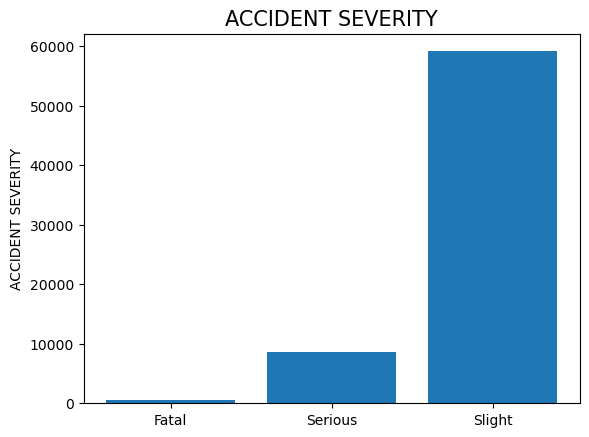

In [11]:
Accident_bar = Accidents.groupby(["Accident_Severity"])["Accident_Index"].count()

Accident_bar.head()

Accident_bar.index

plt.bar(['Fatal','Serious','Slight'], Accident_bar)


plt.title('ACCIDENT SEVERITY', fontsize=15)
plt.ylabel('ACCIDENT SEVERITY')
plt.show()


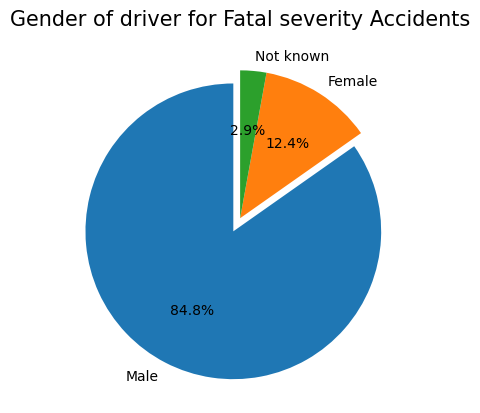

In [15]:
Accident_high = Accidents.loc[Accidents["Accident_Severity"]==1,:]

Accident_high

Gender_count = Accident_high.groupby(["Sex_of_Driver"])["Sex_of_Driver"].count()

Label = ["Male","Female","Not known"]
explode = (0.1,0,0)
sizes = Gender_count

plt.pie(sizes,labels=Label,autopct="%1.1f%%",explode = explode,startangle = 90)

plt.title('Gender of driver for Fatal severity Accidents', fontsize=15)
plt.show()

In [14]:
Age_count = Accident_high.groupby(["Age_Band_of_Driver"])["Age_Band_of_Driver"].count()
Age_count

Age_Band_of_Driver
-1      33
 2       1
 3       3
 4      74
 5     111
 6     152
 7     122
 8      63
 9      36
 10     16
 11     19
Name: Age_Band_of_Driver, dtype: int64

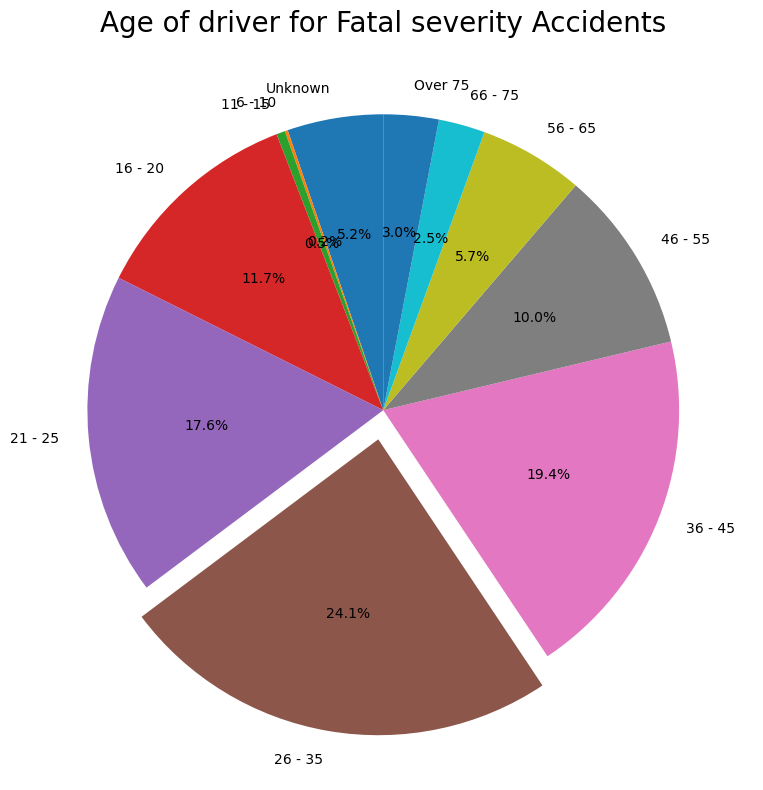

In [36]:
Accident_high = Accidents.loc[Accidents["Accident_Severity"]==1,:]

Accident_high

Age_count = Accident_high.groupby(["Age_Band_of_Driver"])["Age_Band_of_Driver"].count()

unique_age_bands = Accident_high["Age_Band_of_Driver"].unique()


label = ["Unknown","6 - 10","11 - 15","16 - 20","21 - 25","26 - 35","36 - 45","46 - 55","56 - 65","66 - 75","Over 75"]
explode = (0,0,0,0,0,0.1,0,0,0,0,0)
sizes = Age_count
plt.figure(figsize=(8,8))

plt.pie(sizes, labels = label ,autopct="%1.1f%%", explode = explode ,startangle = 90,textprops={"fontsize":10})

plt.title('Age of driver for Fatal severity Accidents', fontsize=20)
plt.tight_layout()
plt.show()


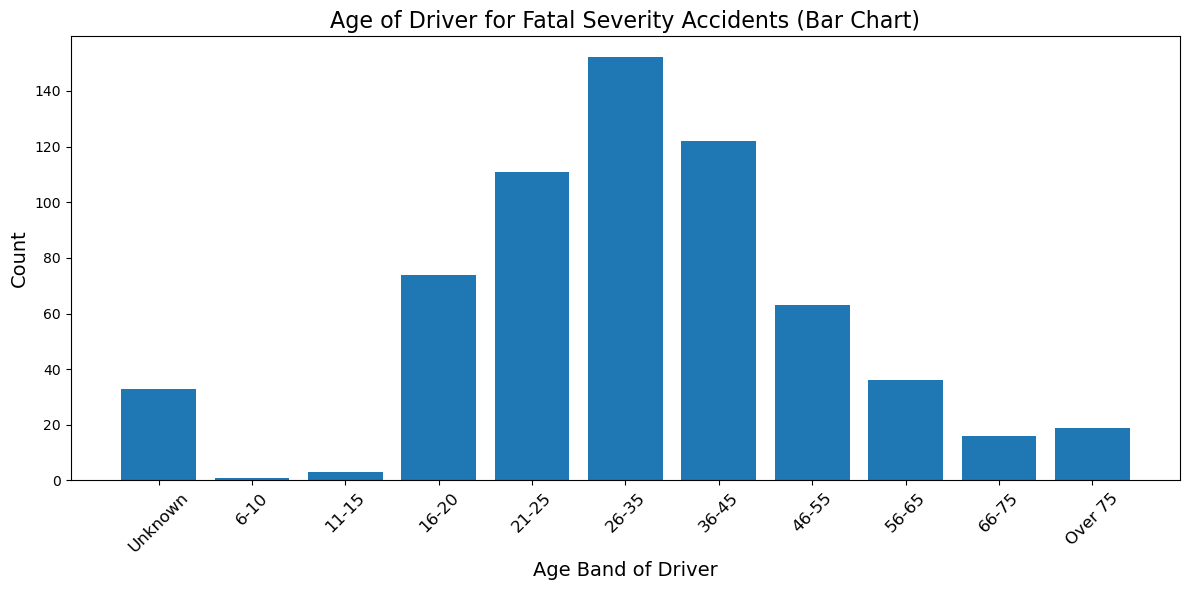

In [31]:
Age_count = Accident_high.groupby(["Age_Band_of_Driver"])["Age_Band_of_Driver"].count()
unique_age_bands = Accident_high["Age_Band_of_Driver"].unique()
label = ["Unknown","6-10","11-15","16-20","21-25","26-35","36-45","46-55","56-65","66-75","Over 75"]


x = range(len(unique_age_bands))
y = Age_count


plt.figure(figsize=(12, 6))
plt.bar(x, y, tick_label=label)


plt.xlabel('Age Band of Driver', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Age of Driver for Fatal Severity Accidents (Bar Chart)', fontsize=16)


plt.xticks(rotation=45, fontsize=12)


plt.tight_layout()
plt.show()


In [51]:
RT_count = Accident_high.groupby(["Road_Type"])["Road_Type"].count()
RT_count


Road_Type
1     16
2      6
3    195
6    408
7      4
9      1
Name: Road_Type, dtype: int64

In [ ]:
Accident_high = Accidents.loc[Accidents["Accident_Severity"]==1,:]

Accident_high

Gender_count = Accident_high.groupby(["Sex_of_Driver"])["Sex_of_Driver"].count()
